## Imports


In [8]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.model_selection import train_test_split

## Import Data

In [9]:
file_path = 'Fish.csv'
fish = pd.read_csv(file_path)
fish.head()


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [10]:
fish.shape

(159, 7)

In [11]:
fish.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [12]:
fish.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [13]:
fish['Species'].value_counts()


Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


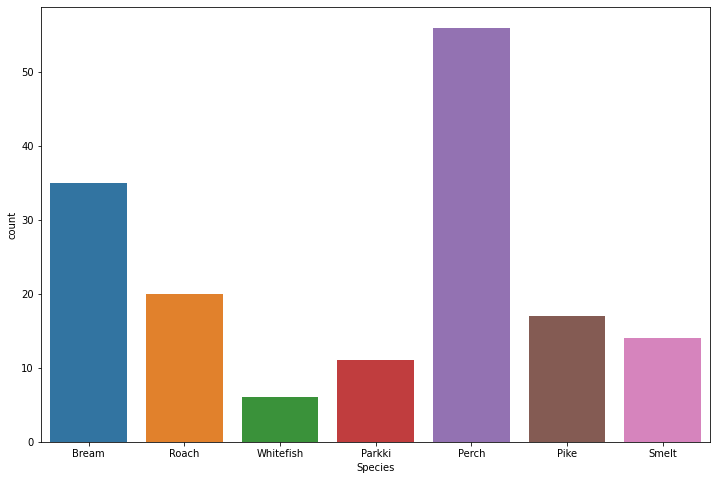

In [14]:
#visualization 
plt.figure(figsize=(12,8))
sns.countplot(fish['Species'])
plt.show()

In [15]:
X=fish.iloc[:,1:]
X.head(2)

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.52,4.0200
1,290.0,24.0,26.3,31.2,12.48,4.3056


In [16]:
y=fish[["Species"]]
y.head()

,Species
0,Bream
1,Bream
2,Bream
3,Bream
4,Bream


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 69)

## SVM

In [18]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 42)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [19]:
classifier.score(X_test,y_test)

0.96875

In [20]:
pred = classifier.predict(X_test)
pred

array(['Perch', 'Roach', 'Bream', 'Perch', 'Perch', 'Smelt', 'Perch',
       'Bream', 'Perch', 'Pike', 'Perch', 'Bream', 'Whitefish',
       'Whitefish', 'Perch', 'Smelt', 'Bream', 'Smelt', 'Perch', 'Parkki',
       'Pike', 'Whitefish', 'Bream', 'Pike', 'Perch', 'Pike', 'Perch',
       'Bream', 'Perch', 'Roach', 'Perch', 'Perch'], dtype=object)

In [21]:
pkl_filename = "Prediction Model.pkl"
with open(pkl_filename, 'wb') as to_write:
    pickle.dump(classifier, to_write)

with open(pkl_filename,'rb') as read_file:
    df = pickle.load(read_file)

In [28]:
df

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [27]:
test_data = [290.0,	24.0,	26.3,	31.2,	12.48, 4.3056]
test_data = np.array(test_data)
test_data = test_data.reshape(1,-1)
print(test_data)
prediction = df.predict(test_data)
print(prediction)

[[290.      24.      26.3     31.2     12.48     4.3056]]
['Bream']
